# Global Video Game Sales EDA Notebook 

<h3>Khaleel Motala - 2023 </h3>

##  Importing the Dataset and Libraries

In [131]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
dataframe = pd.read_csv("vgsales.csv")

## Overview of the Dataset

In [132]:
pd.set_option('display.width', 250) # for readability
print(dataframe.head())
print('')
print(dataframe.info())
print('')
print(dataframe.describe())
print('')
print('Platforms')
print(dataframe['Platform'].unique())
print('Genres')
print(dataframe['Genre'].unique())
print('Total Publishers:', dataframe['Publisher'].nunique())
print('Total Years:', dataframe['Year'].nunique())




   Rank                      Name Platform    Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo     41.49     29.02      3.77         8.46         82.74
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo     29.08      3.58      6.81         0.77         40.24
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo     15.85     12.88      3.79         3.31         35.82
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo     15.75     11.01      3.28         2.96         33.00
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo     11.27      8.89     10.22         1.00         31.37

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank   

## Cleaning the Data

- Drop columns that is missing data in the rows. Most of this happens to be in the "Year" Column, and there are a couple publishers missing.

- Convert the "Year" column to datetime for ease of use later. Making the column "Year_" because I dont think I want to replace the actual year column just yet. 

- Because there are so many pubishers, it may be a good idea to limit to the top publishers in global sales later.

In [133]:
#Removing N/A Values
dataframe.dropna(inplace = True)
dataframe['Year_'] = pd.to_datetime(dataframe.Year, format='%Y')
print(dataframe.head())
#dataframe.info()

# Creating a new DF pivot table which sorts out the Platform to Sales
platformgroup = dataframe.drop(columns=['Name', 'Publisher', 'Genre', 'Year', 'Rank', 'Year_'])
platformgroup = platformgroup.groupby(['Platform']).sum()
platformgroup = platformgroup.sort_values(by='Global_Sales', ascending=False)
print(platformgroup.head(10))

# Same as above but for Publishers
publishergroup = dataframe.drop(columns=['Name', 'Platform', 'Genre', 'Year', 'Rank', 'Year_'])
publishergroup = publishergroup.groupby(['Publisher']).sum()
publishergroup = publishergroup.sort_values(by='Global_Sales', ascending=False)
print(publishergroup.head(10))

# And once again for Genres
genregroup = dataframe.drop(columns=['Name', 'Platform', 'Publisher', 'Year', 'Rank', 'Year_'])
genregroup = genregroup.groupby(['Genre']).sum()
genregroup = genregroup.sort_values(by='Global_Sales', ascending=False)
print(genregroup.head(10))

print(dataframe.info())

   Rank                      Name Platform    Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales      Year_
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo     41.49     29.02      3.77         8.46         82.74 2006-01-01
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo     29.08      3.58      6.81         0.77         40.24 1985-01-01
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo     15.85     12.88      3.79         3.31         35.82 2008-01-01
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo     15.75     11.01      3.28         2.96         33.00 2009-01-01
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo     11.27      8.89     10.22         1.00         31.37 1996-01-01
          NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform                                                         
PS2       

# Analysis

Moving on from the basics, there are 2 categories we will be looking at today: 
- Non-Game related, which includes Release Date and Publishers.
- Game Related, which includes Genre and Platform.

Both of these will include some analysis where we will look at their performance per region too.

Lastly, we will then be gathering the most popular games based on these parameters and compiling a list of the most successful games by sales. 

The main purpose of this notebook is to explore the impacts on sales by analyzing regional, platform, genre, and release date dynamics, and which of these factors pose the strongest correlation to sales.  

## Release Date Analysis

We start by plotting our data on sales over time. This will show us popularity over time. 

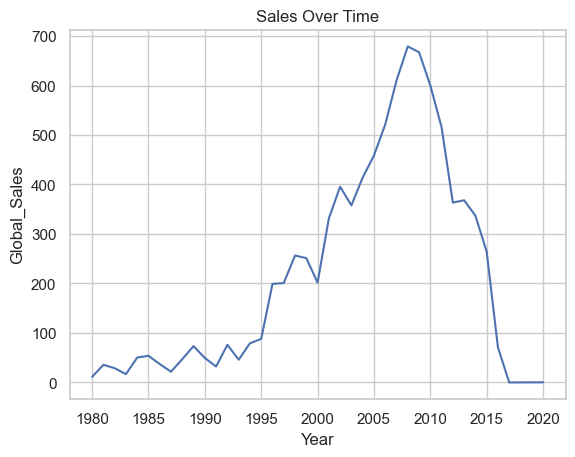

In [201]:

yearsales = dataframe.drop(columns=['Year_'])
yearsales = yearsales.groupby('Year').sum()
sns.lineplot(x=yearsales.index, y=yearsales['Global_Sales'], data=yearsales)
plt.title('Sales Over Time')
plt.show()

The gaming industry has shown significant growth between the 90s and 2010s, followed by a steep dropoff in sales. I believe this is likely due to unfinished data at the end of the dataset. 

This section will be explored later as a comparison in the genre section of the analysis, as there will be more to explore categorically than just by time. 

## Publisher Analysis

Now to plot a few bar charts for sales in each major region, categorized by publisher.

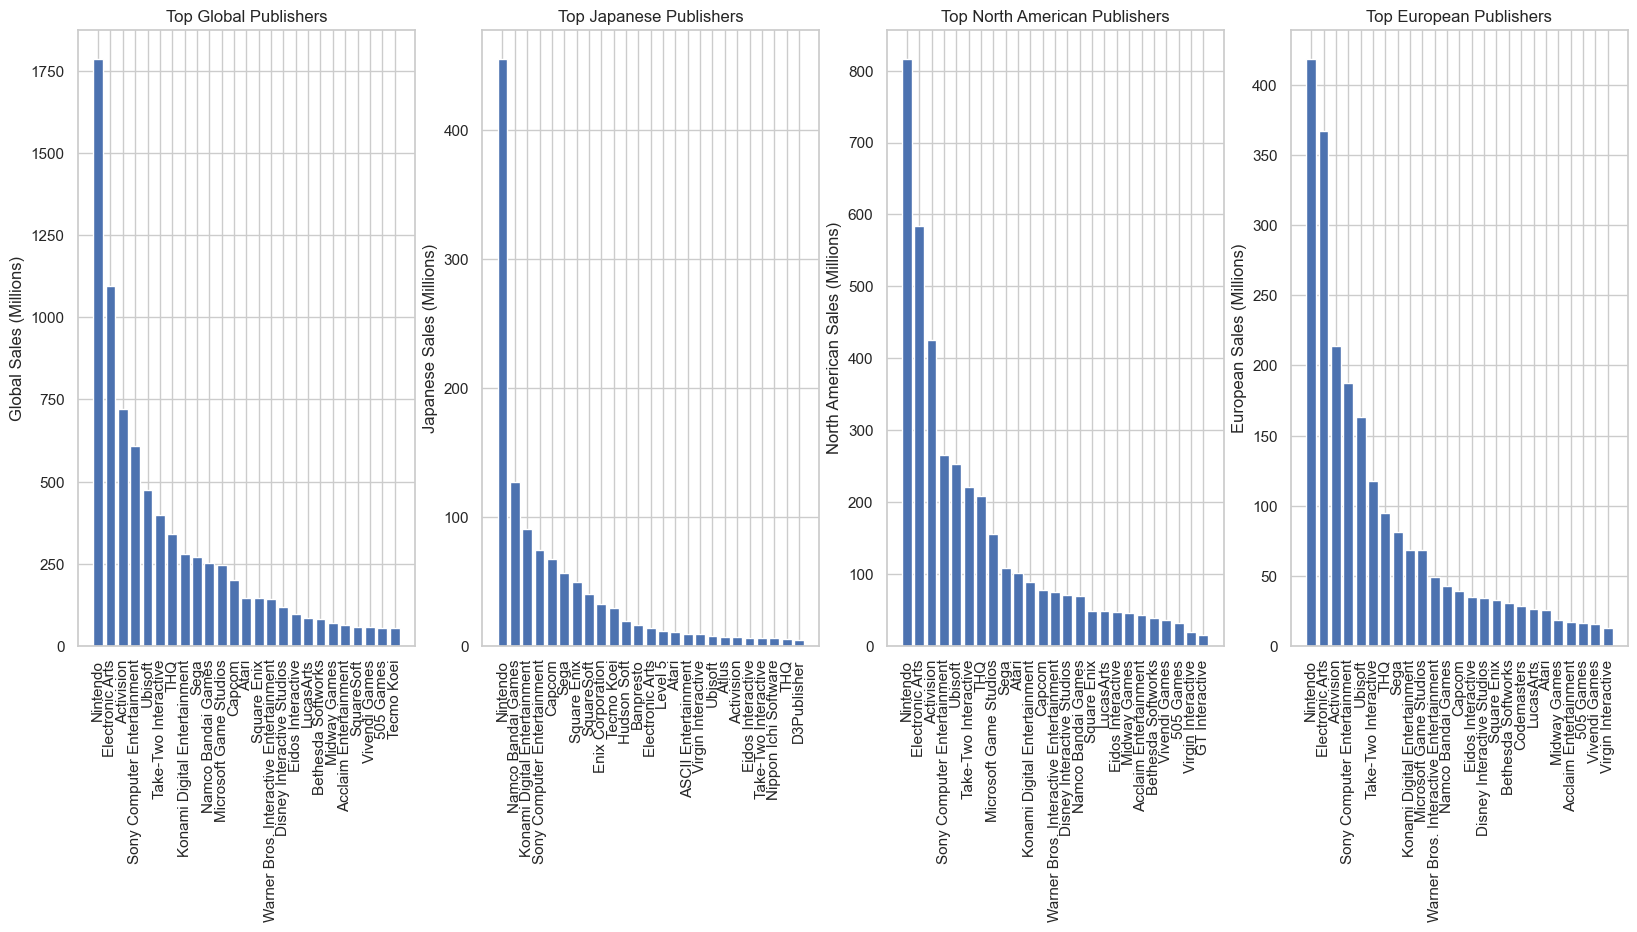

In [135]:
fig, ax = plt.subplots(1,4,sharey=False, figsize=(20, 8))

# Form top 25 publishers for each major region
top_global_publishers = publishergroup.nlargest(25, 'Global_Sales')
top_jp_publishers = publishergroup.nlargest(25, 'JP_Sales')
top_na_publishers = publishergroup.nlargest(25, 'NA_Sales')
top_eu_publishers = publishergroup.nlargest(25, 'EU_Sales')

# Global
ax[0].bar(top_global_publishers.index,top_global_publishers['Global_Sales'])
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_title('Top Global Publishers')
ax[0].set_ylabel('Global Sales (Millions)')

# JP
ax[1].bar(top_jp_publishers.index,top_jp_publishers['JP_Sales'])
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_title('Top Japanese Publishers')
ax[1].set_ylabel('Japanese Sales (Millions)')

# NA 
ax[2].bar(top_na_publishers.index,top_na_publishers['NA_Sales'])
ax[2].tick_params(axis='x', rotation=90)
ax[2].set_title('Top North American Publishers')
ax[2].set_ylabel('North American Sales (Millions)')

# EU
ax[3].bar(top_eu_publishers.index,top_eu_publishers['EU_Sales'])
ax[3].tick_params(axis='x', rotation=90)
ax[3].set_title('Top European Publishers')
ax[3].set_ylabel('European Sales (Millions)')

plt.show()

As we can see in the charts above, Nintendo dominates in all regions. Nintendo has been around since essentially the inception of the gaming industry, and continues to be a powerhouse today. Outside of Japan, Electronic Arts sales are not too far behind, making games such as FIFA, The Sims, and Battlefield. 

For use later, I want to get the top 5 games of each of the top publishers.

In [136]:
toppublisherslist = ['Nintendo', 'Activision', 'Electronic Arts', 'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive']
toppublishersgames = dataframe[dataframe['Publisher'].isin(toppublisherslist)]
toppublishersgames = toppublishersgames.pivot_table(values=['Global_Sales','NA_Sales' , 'EU_Sales' , 'JP_Sales'], index=['Publisher', 'Name'], aggfunc=sum)
toppublishersgames = toppublishersgames.sort_values(by='Global_Sales', ascending=False)
toppublishersgames = toppublishersgames.groupby('Publisher').apply(lambda group: group.nlargest(5, 'Global_Sales'))
toppublishersgames = toppublishersgames.reset_index(level=0, drop=True)
print(toppublishersgames.head(50))

                                                             EU_Sales  Global_Sales  JP_Sales  NA_Sales
Publisher                   Name                                                                       
Activision                  Call of Duty: Modern Warfare 3      11.29         30.83      0.62     15.58
                            Call of Duty: Black Ops II          11.05         29.72      0.72     14.08
                            Call of Duty: Black Ops              8.69         29.40      0.59     17.01
                            Call of Duty: Ghosts                 9.05         27.38      0.48     14.92
                            Call of Duty: Black Ops 3            9.56         25.32      0.43     11.89
Electronic Arts             FIFA 15                             12.40         19.02      0.13      3.20
                            Battlefield 3                        6.49         17.36      0.41      8.20
                            FIFA 14                             

## Genre Analysis

### Sales Comparison

We can now move on to look at genre dynamics. First, we look at general sales with a simple chart. 

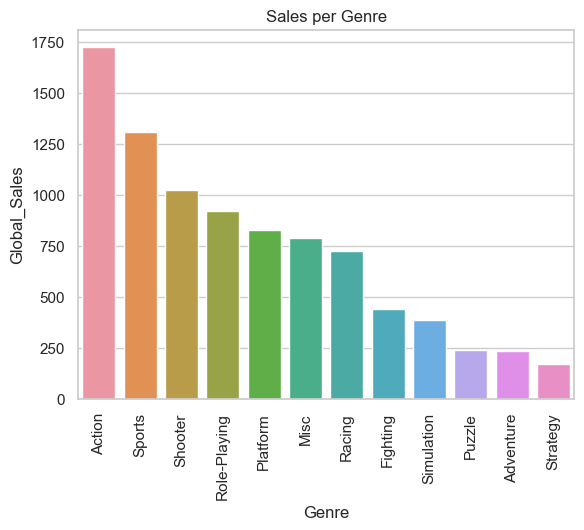

In [137]:
genreplot = sns.barplot(x=genregroup.index,y=genregroup['Global_Sales'], data=genregroup)
genreplot.set_xticklabels(genreplot.get_xticklabels(), rotation=90)
genreplot.set_title('Sales per Genre')

plt.show()

C:\Users\khale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


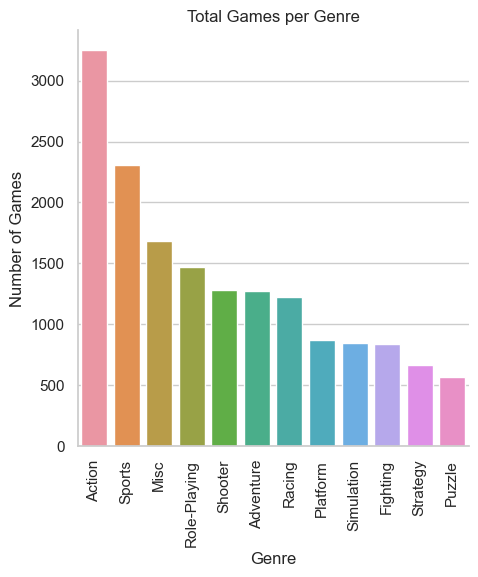

In [138]:
# Value Counts of Genre
genrecount = dataframe.drop(columns=['Name', 'Platform', 'Publisher', 'Year', 'Rank', 'Year_', 'NA_Sales' , 'EU_Sales'  ,'JP_Sales'  ,'Other_Sales',  'Global_Sales'])
genrecount = genrecount.groupby(['Genre']).value_counts()
genrecount = genrecount.sort_values(ascending=False)
# This will be used later

# Plotting total games in each genre
genrecountplot = sns.catplot(x='Genre', kind='count', data=dataframe, order=dataframe.Genre.value_counts().index)
genrecountplot.set_xticklabels(rotation=90)
genrecountplot.set_axis_labels('Genre', 'Number of Games')

plt.title('Total Games per Genre')

plt.show()


From these charts we can see that Action is the largest genre. Sports is 2nd, once again mostly due to Wii Sports sales and FIFA. One thing to note here is just because there are more games made, it does not match total sales numbers.

Through the years, there have been many generations of gaming. This dataset covers over 40 years of data, consisting of many generations of gaming. I will be classifying the generations by the major consoles released in the era. There were generations before 1989, but I won't be including these as a seperate generation. 

We will now be plotting this on a scatter plot to see the relationship to number of games made vs sales.

              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  count
Genre                                                                       
Action          861.77    516.48    158.65       184.92       1722.84   3251
Sports          670.09    371.34    134.76       132.65       1309.24   2304
Shooter         575.16    310.45     38.18       101.90       1026.20   1282
Role-Playing    326.50    187.57    350.29        59.38        923.83   1470
Platform        445.99    200.65    130.65        51.51        829.13    875


C:\Users\khale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x2000 with 0 Axes>

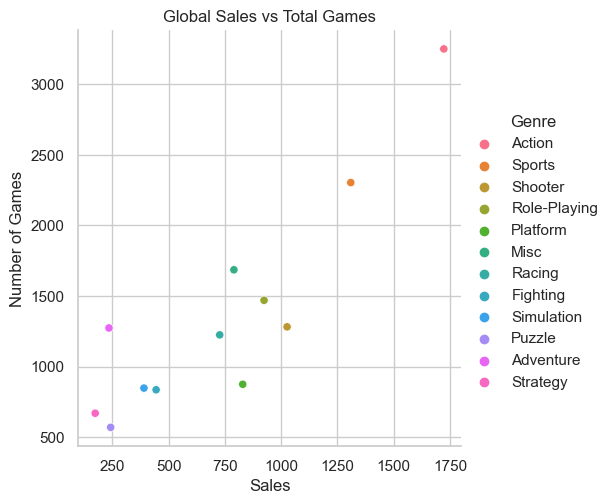

In [205]:

genrerel = genregroup.merge(genrecount, left_index=True, right_index=True, how='left') # Merging our genre tables. 
print(genrerel.head())

plt.figure(figsize=(10, 20))

genrelplot = sns.relplot(x='Global_Sales', y='count', data=genrerel, hue=genregroup.index) # Scatter plot with a legend.

plt.xlabel('Sales')
plt.ylabel('Number of Games')
plt.title('Global Sales vs Total Games')
plt.show()

We can now compare clearly that different game types have significantly more sales even when there are the same amount of total games. We can see how shooters outsell genres such as RPGs, Platform, and Adventure games, while still having about the same amount of games (or less) in total.

### Time series comparison

C:\Users\khale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


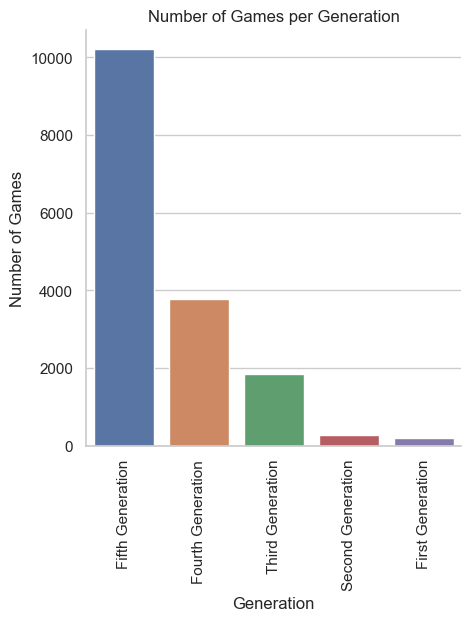

In [200]:
# Making a function to define the Generations
def generation_def(year):
    if year <= 1989:
        return 'First Generation'
    elif 1989 < year <= 1994:
        return 'Second Generation'
    elif 1994 < year <= 2000:
        return 'Third Generation'
    elif 2000 < year <= 2005:
        return 'Fourth Generation'
    elif 2005 < year <= 2017:
        return 'Fifth Generation'
    else:
        return 'Fifth Generation'

# Creating the Column
dataframe['Generation'] = dataframe['Year'].apply(generation_def)

#print(dataframe.head(10))

genplot = sns.catplot(x='Generation', kind='count', data=dataframe, order=dataframe.Generation.value_counts().index)
genplot.set_xticklabels(rotation=90)
genplot.set_axis_labels('Generation', 'Number of Games')
plt.title('Number of Games per Generation')
plt.show()


A whopping number of games made in the Fifth Generation, which would make sense as this generation also has the most amount of platforms and had a heavy focus on new IP's and console games. Current generations have likely more games released on a yearly basis but a lot of these are mobile and PC games whose stats are not tracked by this dataset. Now we need to create a bar chart to analyze this data by genre to see which genres trended the highest for each generation. 

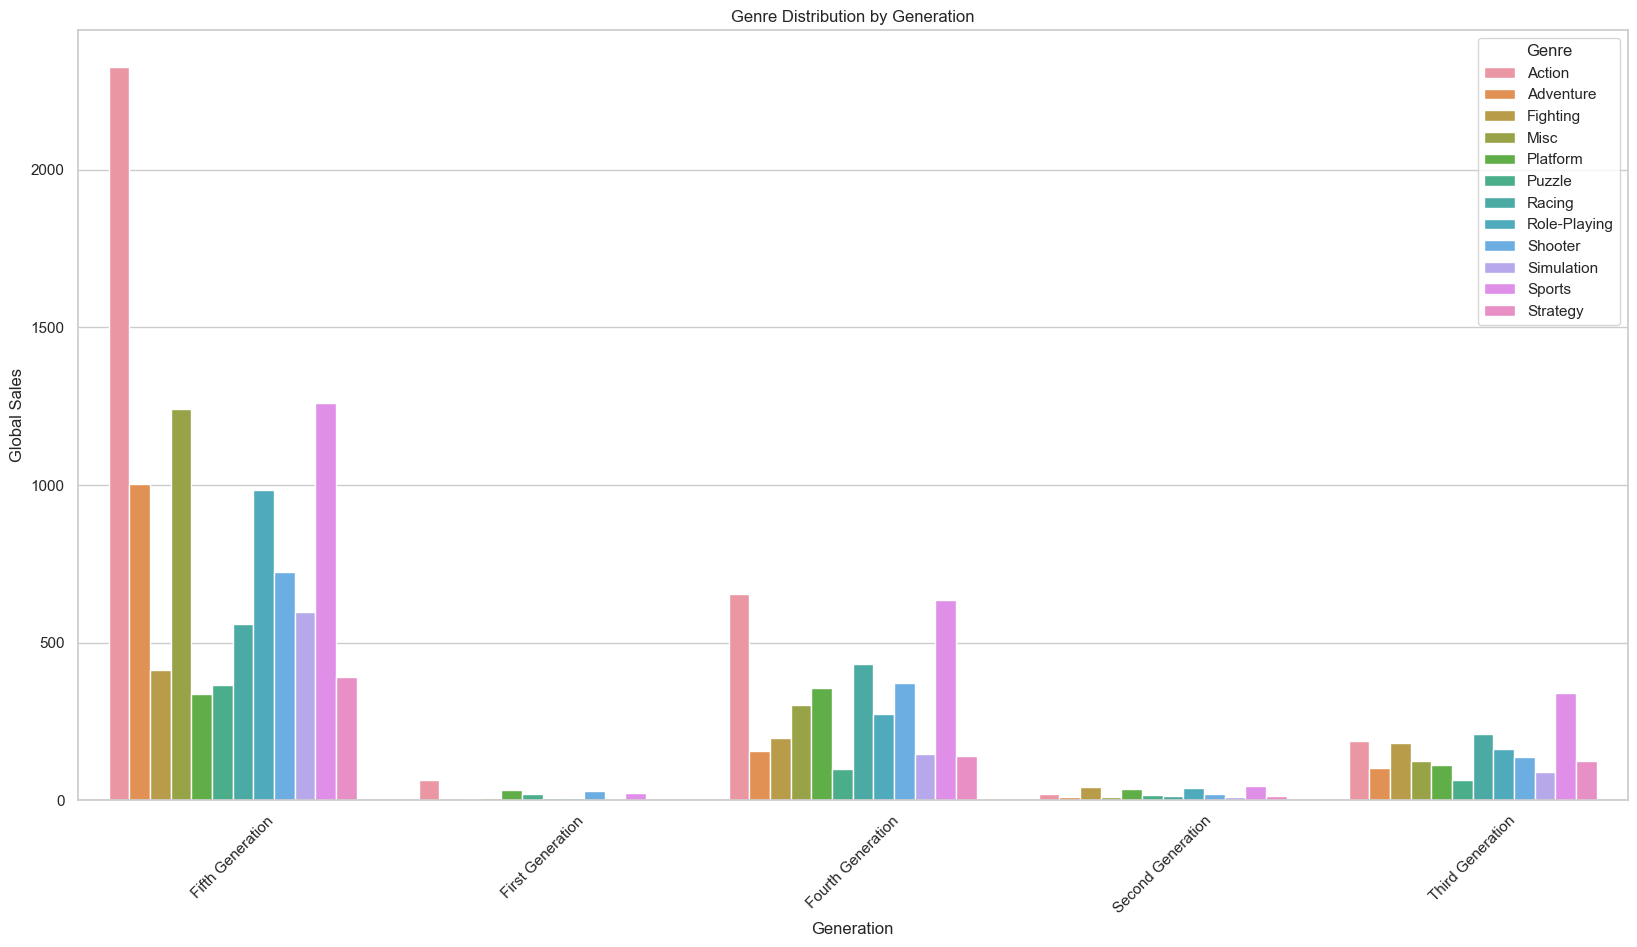

In [199]:
plt.figure(figsize=(20, 10))

genplot = sns.barplot(x='Generation', y='count', hue='Genre', data=dataframe.groupby(['Generation', 'Genre']).size().reset_index(name='count'))

plt.xticks(rotation=45)
plt.xlabel('Generation')
plt.ylabel('Global Sales')
plt.title('Genre Distribution by Generation')
plt.show()

Now we have a better idea of how spread this data is by genre. Sports and action are prevalent in each generation, but the Misc and Shooter genres have spikes in the sixth and fifth generations. First and second generations contribute the least to sales. The action genre is still notable there but there are some genres that barely existed back then to really contribute to any sales.

We will come back later to look at the top games in each generation later, but for now we will continues the genre analysis.

With the fifth generation being the largest, I would like to plot how sales have looked over the years through this generation. To make the graph legible I will only include the top selling genres. 

C:\Users\khale\AppData\Local\Temp\ipykernel_17588\3816491879.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Year', y='Global_Sales', data=gen5, hue='Genre', ci=False)


Text(0.5, 1.0, 'Genre Sales Over Time')

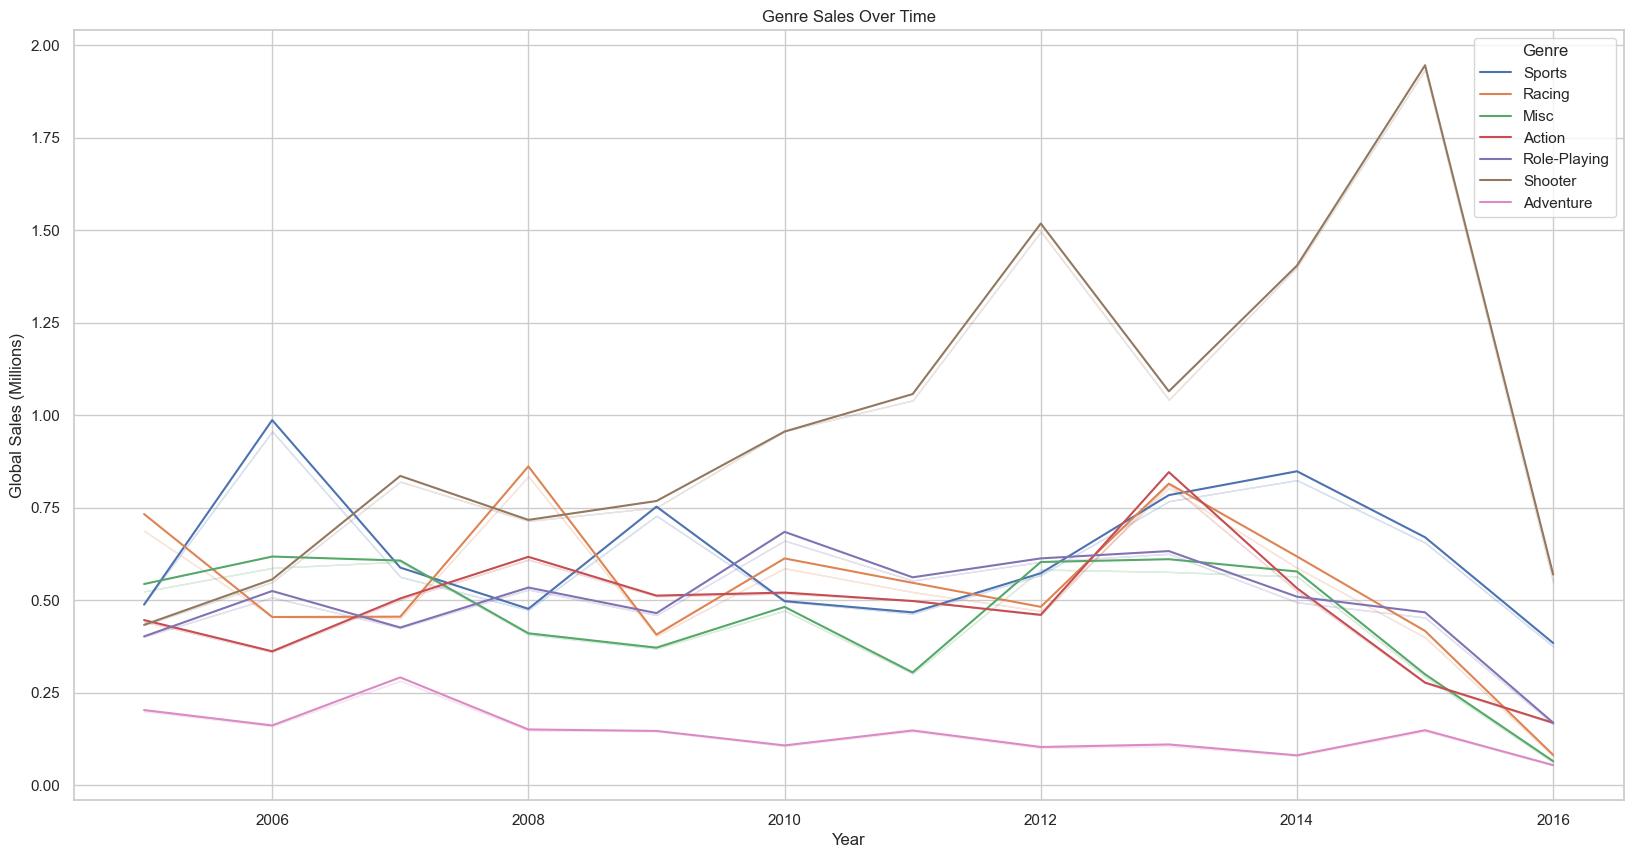

In [197]:
included_genres = ['Action', 'Adventure', 'Misc', 'Racing', 'Role-Playing', 'Shooter', 'Sports']
gen5 = dataframe[(dataframe['Year'] >= 2005) & (dataframe['Year'] <= 2016)]
gen5= gen5.loc[gen5['Genre'].isin(included_genres)]
#print(gen5.head())
plt.figure(figsize=(20, 10))
sns.lineplot(x='Year', y='Global_Sales', data=gen5, hue='Genre', ci=False)
plt.xlabel('Year')
plt.ylabel('Average Global Sales (Millions)')
plt.title('Genre Sales Over Time')

There was significant growth of the shooter genre through this generation, as multiplayer gameplay and 3D graphics advanced quite far during this time to really make this genre standout.

2016 was where the data started to wear thin in this dataset, and we can see a decline for all genres there. 

### Region/Genre Comparison

We also need to compare this regionally, so now to create a stacked bar chart.

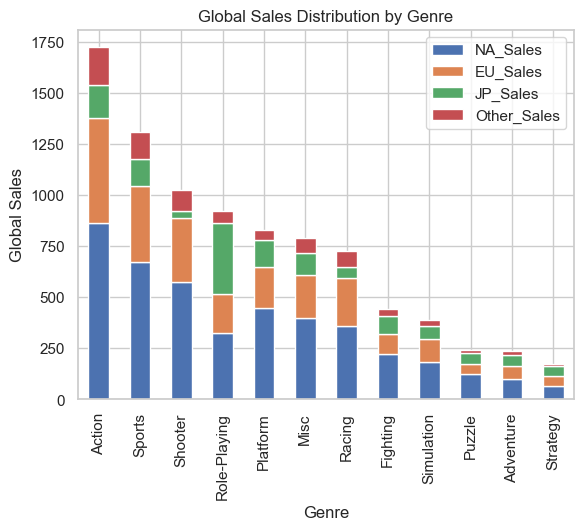

In [142]:
# Regional genre comparisons, Global needs to be dropped
reg_genres= genregroup.drop(columns=['Global_Sales'])

reg_genres.plot(kind='bar',stacked=True)

plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.title('Global Sales Distribution by Genre')
plt.show()

Immediate standout to me is the popularity of RPGs in Japan, as this is the only category where Japan makes most of their sales. We can also see how Japan generally does not seem to purchase shooter games, which would be inline with the publishers chart from earlier, as Nintendo only developed two stand-out shooters in the past two decades. Every other category has a pretty even distribution, showing NA with generally the most sales, followed by EU and then JP and Other. 

Similarly with publishers, I need a list of top games per genre.

In [143]:
topgenregames = dataframe.pivot_table(values=['Global_Sales','NA_Sales' , 'EU_Sales' , 'JP_Sales'], index=['Genre', 'Name'], aggfunc=sum)
topgenregames = topgenregames.sort_values(by='Global_Sales', ascending=False)
topgenregames = topgenregames.groupby('Genre').apply(lambda group: group.nlargest(5, 'Global_Sales'))
topgenregames = topgenregames.reset_index(level=0, drop=True)

print(topgenregames.head(50))

                                                           EU_Sales  Global_Sales  JP_Sales  NA_Sales
Genre        Name                                                                                    
Action       Grand Theft Auto V                               23.04         55.92      1.39     23.46
             Grand Theft Auto: San Andreas                     1.96         23.86      0.41     10.77
             Grand Theft Auto IV                               7.65         22.47      0.58     11.53
             Grand Theft Auto: Vice City                       5.52         16.19      0.47      8.41
             FIFA Soccer 13                                   10.25         16.16      0.23      2.64
Adventure    Assassin's Creed                                  4.48         11.30      0.16      5.20
             Super Mario Land 2: 6 Golden Coins                2.04         11.18      2.69      6.16
             L.A. Noire                                        2.27          5.95 

## Platform Analysis

Moving on from genre, we will now look at platforms. 

First we will look at the total sales of the top platforms for each region. 

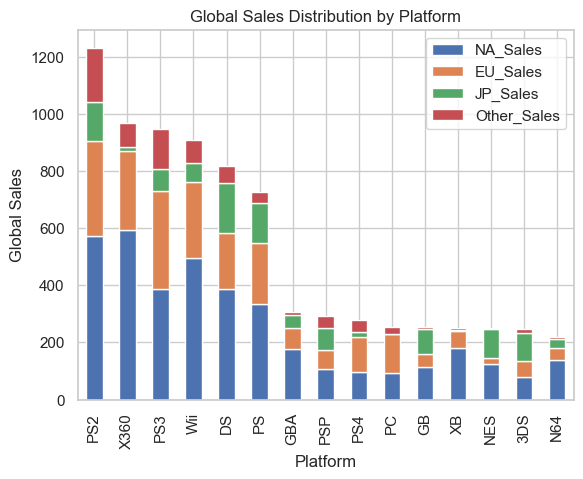

In [144]:
# Form top 10 platforms
top_global_platforms = platformgroup.nlargest(15, 'Global_Sales')
top_global_platforms = top_global_platforms.drop(columns=['Global_Sales'])
#top_jp_platforms = platformgroup.nlargest(10, 'JP_Sales')
#top_na_platforms = platformgroup.nlargest(10, 'NA_Sales')
#top_eu_platforms = platformgroup.nlargest(10, 'EU_Sales')
# ^ Might need these later

top_global_platforms.plot(kind='bar',stacked=True)

plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.title('Global Sales Distribution by Platform')
plt.show()


Now we have a plot comparing sales of the top consoles in each country. NA makes up about half the total sales, followed by EU and JP. Xbox has virtually no sales in JP, while Nintendo based consoles such as the DS, NES, GBA have a higher percentage of Japanese Sales. EU makes most of the sales for PC and PS4, and is very close NA for PS3. 

Now, in the same way we did publishers, we will take our top 5 games for each of the top platforms. 

In [145]:
topplatformslist = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

topplatformsgames = dataframe[dataframe['Platform'].isin(topplatformslist)]
topplatformsgames = topplatformsgames.pivot_table(values=['Global_Sales','NA_Sales' , 'EU_Sales' , 'JP_Sales'], index=['Platform', 'Name'], aggfunc=sum)
topplatformsgames = topplatformsgames.sort_values(by='Global_Sales', ascending=False)
topplatformsgames = topplatformsgames.groupby('Platform').apply(lambda group: group.nlargest(5, 'Global_Sales'))
topplatformsgames = topplatformsgames.reset_index(level=0, drop=True)

print(topplatformsgames.head(50))

                                                       EU_Sales  Global_Sales  JP_Sales  NA_Sales
Platform Name                                                                                    
DS       New Super Mario Bros.                             9.23         30.01      6.50     11.38
         Nintendogs                                       11.00         24.76      1.93      9.07
         Mario Kart DS                                     7.57         23.42      4.13      9.81
         Brain Age: Train Your Brain in Minutes a Day      9.26         20.22      4.16      4.75
         Pokemon Diamond/Pokemon Pearl                     4.52         18.36      6.04      6.42
PS       Gran Turismo                                      3.87         10.95      2.54      4.02
         Final Fantasy VII                                 2.47          9.72      3.28      3.01
         Gran Turismo 2                                    3.42          9.49      1.69      3.88
         Final Fanta

## Top Games Analysis

We need to merge the top games tables from earlier with an inner merge, which will give us all the matching games that fit all our top criteria. 

In [171]:
# Merging Tables and Cleaning
TopGames = pd.merge(pd.merge(topgenregames,toppublishersgames,on='Name',how='inner'),topplatformsgames,on='Name',how='inner')
TopGames = TopGames.drop(columns=['EU_Sales_x','Global_Sales_x','JP_Sales_x','NA_Sales_x','EU_Sales_y','Global_Sales_y','JP_Sales_y','NA_Sales_y'])
TopGames = TopGames.merge(dataframe, on='Name', how='left', validate='m:m', suffixes=('_x', ''))
TopGames.drop(columns=['EU_Sales_x','Global_Sales_x','JP_Sales_x','NA_Sales_x'], inplace=True)

# Organizing the Table
TopGames.sort_values(by='Global_Sales', ascending=False, inplace=True)
TopGames.drop_duplicates('Name', inplace=True)
TopGames = TopGames.set_index('Name')

# Showing Results
print(TopGames.info())
TopGames

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Wii Sports to Call of Duty: Black Ops II
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          10 non-null     int64         
 1   Platform      10 non-null     object        
 2   Year          10 non-null     float64       
 3   Genre         10 non-null     object        
 4   Publisher     10 non-null     object        
 5   NA_Sales      10 non-null     float64       
 6   EU_Sales      10 non-null     float64       
 7   JP_Sales      10 non-null     float64       
 8   Other_Sales   10 non-null     float64       
 9   Global_Sales  10 non-null     float64       
 10  Year_         10 non-null     datetime64[ns]
 11  Generation    10 non-null     object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 1.0+ KB
None


,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_,Generation
Name,,,,,,,,,,,,
Wii Sports,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2006-01-01,Fifth Generation
Mario Kart Wii,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2008-01-01,Fifth Generation
Wii Sports Resort,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2009-01-01,Fifth Generation
Grand Theft Auto V,17,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,2013-01-01,Fifth Generation
Grand Theft Auto: San Andreas,18,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,2004-01-01,Fourth Generation
Grand Theft Auto: Vice City,25,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,2002-01-01,Fourth Generation
Gran Turismo 3: A-Spec,29,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98,2001-01-01,Fourth Generation
Call of Duty: Modern Warfare 3,30,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,2011-01-01,Fifth Generation
Call of Duty: Black Ops,32,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64,2010-01-01,Fifth Generation


We now have a list of games that fit all of the top criteria. We'll dive into reasons why at the end, but for now we can see how these games sell by country.

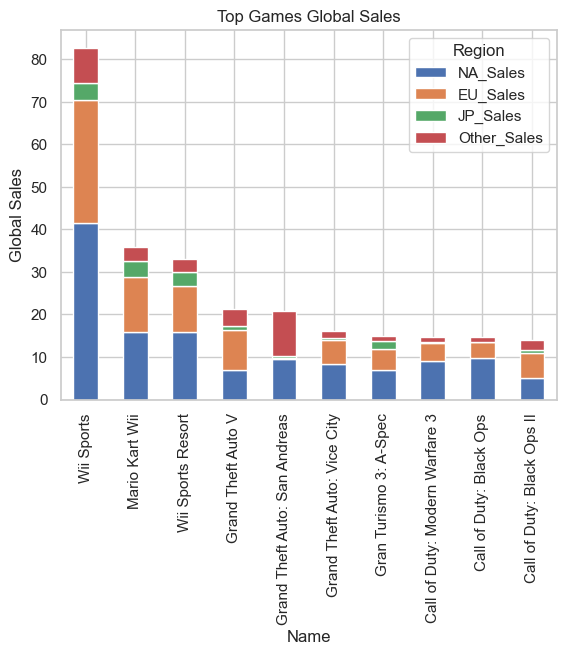

In [174]:
TopGamesPlot = TopGames.drop(columns=['Rank', 'Platform', 'Publisher', 'Year', 'Rank', 'Year_', 'Generation', 'Global_Sales'])
TopGamesPlot.plot(kind='bar',stacked=True)
plt.xlabel('Name')
plt.ylabel('Global Sales')
plt.xticks(rotation=90)
plt.title('Top Games Global Sales')
plt.legend(title='Region')
plt.show()

Wii Sports still dominates sales in every region. At the time the Wii Sports was considered a fairly revolutionary game, where it made use of the WiiMote motion controls to simulate games like bowling and tennis. Mario Kart Wii was similar, allowing the user to use the controller like a steering wheel. 

The three Nintendo games at the top are all family friendly games, which allows them to take advantage of such a large market - from children to adults, and casual to hardcore gamers alike - to play their games and enjoy them. Mix that with the new motion controls concept that seemed to take the industry by storm and it is easy to see why the sales were so high. 

Outside of Wii Sports, every other game listed here is a franchise title, meaning there have been games before these that helped boost their popularity. Games like GTA and COD have been incredibly popular for a very long time, but these games are also rather graphic, which limits their perspective audiences. It is interesting to see that games of these categories still make it to the top of the list even with that handicap. 

Grand Theft Auto: San Andreas has a noticeably large "Other Sales", meaning the popularity of this game expanded much further beyond just the top three regions. It also had negligible sales in Europe and Japan.

Most of the Japanese sales are in games made in Japan: Wii Sports and Wii Sports Resort, Mario Kart Wii, and Gran Turismo 3. Gran Turismo 3 is an interesting game to see here, as the racing market has been shrinking over the years, the release of this game on the PlayStation 2 was quite big, but we have not seen racing games keep this level of sales since. 

NA and European sales tend to match eachother quite well, games that are popular in one are usually popular in the other (Not including San Andreas)

## In Conclusion

There are noticable trends in the gaming industry when considering both categories. Specifically: 
- Certain games and publishers have popularity in specific regions. Specifically, with the Japanese market, local developers tend to have much more success than western developers. 
- Genre plays a significant role in game success. When comparing game genres with the same amount of games, some genres have more sales than others. 
- There are noticable trends in genre popularity over time, with some genres, such as shooters, really starting to take over the market in certain eras Other genres, such as platformers, tend to not have as much presence. 
- Platform sales directly correlate with sales of games, but sometimes there are platforms with only a few popular games, and so this is not as much of a factor. I would say platforms can allow accessibility to games to allow them to become more successful, but do not factor into the quality of the games. 

This now concludes the Python segment of the EDA. I will be moving to Tableau to do more dynamic geographical analysis!